In [21]:
areas_cnt = {}
gender_cnt = {}
grade_cnt = {}

fp = open('orbi_areas.txt', 'r')
fp2 = open('orbi_grade_route.txt', 'r')
fp3 = open('orbi_gender.txt', 'r')
def FrequencyCount(f, dict):
    for line in f:
        line = line.rstrip("\n")
        line = line.lstrip()
        if(line != ""):
            dict[line] = dict.get(line, 0) + 1

    for key, val in dict.items():
        print(key, val)
    
    sum = 0
    for key, val in dict.items():
        if(key != ""):
            sum += val
            
    dict['total'] = sum
    print(sum)
    return dict

def GradeFrequencyCount(f, dict):
    dict2 = {}
    for line in f:
        line = line.rstrip("\n")
        line = line.lstrip()
        
        if(line != ""):
            if(line == "문과" or line == "이과"):
                dict2[line] = dict2.get(line, 0) + 1
                
            else:
                dict[line] = dict.get(line, 0) + 1

    sum=0
    sum2 = 0
    for key, val in dict.items():
        print(key, val)
        if(key != ""):
            sum += val
    
    for key, val in dict2.items():
        print(key, val)
        if(key != ""):
            sum2 += val        
            
    dict['total'] = sum
    dict2['미응답'] = sum-sum2
    dict2['total'] = sum
    print(sum)
    return dict, dict2

In [22]:
areas_cnt = FrequencyCount(fp.readlines(), areas_cnt)

서울 마포구 370
서울 강남구 1850
서울 광진구 370
서울 서초구 1480
서울 구로구 370
서울 강북구 370
서울 노원구 740
서울 은평구 370
서울 서대문구 370
서울 동대문구 370
서울 양천구 370
서울 도봉구 370
7400


In [23]:
grade_cnt, grade_cnt2 = GradeFrequencyCount(fp2.readlines(), grade_cnt)

재수/N수생 2220
대학생 1480
중1 740
고3 1110
고1 1480
중3 370
문과 3330
이과 3330
7400


In [24]:
gender_cnt = FrequencyCount(fp3.readlines(), gender_cnt)

남 2590
여 4810
7400


In [25]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import pie, axis, show
from matplotlib import rc, font_manager
import numpy as np
import pandas as pd

In [26]:
S1 = pd.Series(areas_cnt)
S2 = pd.Series(grade_cnt)
S3 = pd.Series(grade_cnt2)
S4 = pd.Series(gender_cnt)
total = areas_cnt['total']
print(S1, "\n")
print(S2, "\n")
print(S3, "\n")
print(S4, "\n")

서울 마포구      370
서울 강남구     1850
서울 광진구      370
서울 서초구     1480
서울 구로구      370
서울 강북구      370
서울 노원구      740
서울 은평구      370
서울 서대문구     370
서울 동대문구     370
서울 양천구      370
서울 도봉구      370
total      7400
dtype: int64 

재수/N수생    2220
대학생       1480
중1         740
고3        1110
고1        1480
중3         370
total     7400
dtype: int64 

문과       3330
이과       3330
미응답       740
total    7400
dtype: int64 

남        2590
여        4810
total    7400
dtype: int64 



In [27]:
Data = {'Area': list(areas_cnt.keys()), 'count': list(areas_cnt.values())}
Area = pd.DataFrame.from_dict(Data)
Area = Area.sort_values(by = ['count'], ascending = False)
Area.index = ["" if i is 0 else i for i in range(0, len(Area['count']))]
Area['percentage'] = [str(percent*100/total)+'%' for percent in Area['count']]

In [28]:
Data2 = {'학년': list(grade_cnt.keys()), 'count': list(grade_cnt.values())}
Grade = pd.DataFrame.from_dict(Data2)
Grade['percentage'] = [str(percent*100/total)+'%' for percent in Grade['count']]
Grade = Grade.sort_values(by = ['count'], ascending = False)
Grade.index = ["" if i is 0 else i for i in range(0, len(Grade['count']))]

In [29]:
Data3 = {'문과/이과': list(grade_cnt2.keys()), 'count': list(grade_cnt2.values())}
Grade2 = pd.DataFrame.from_dict(Data3)
Grade2 = Grade2.sort_values(by = ['count'], ascending = False)
Grade2['percentage'] = [str(percent*100/total)+'%' for percent in Grade2['count']]
Grade2.index = ["" if i is 0 else i for i in range(0, len(Grade2['count']))]

In [30]:
Data4 = {'성별': list(gender_cnt.keys()), 'count': list(gender_cnt.values())}
Gender = pd.DataFrame(Data4)
Gender = Gender.sort_values(by = ['count'], ascending = False)
Gender['percentage'] = [str(percent*100/total)+'%' for percent in Gender['count']]
Gender.index = ["" if i is 0 else i for i in range(0, len(Gender['count']))]

In [31]:
Area

Area  count percentage
      total   7400     100.0%
1    서울 강남구   1850      25.0%
2    서울 서초구   1480      20.0%
3    서울 노원구    740      10.0%
4    서울 마포구    370       5.0%
5    서울 광진구    370       5.0%
6    서울 구로구    370       5.0%
7    서울 강북구    370       5.0%
8    서울 은평구    370       5.0%
9   서울 서대문구    370       5.0%
10  서울 동대문구    370       5.0%
11   서울 양천구    370       5.0%
12   서울 도봉구    370       5.0%

In [32]:
Grade

학년  count percentage
    total   7400     100.0%
1  재수/N수생   2220      30.0%
2     대학생   1480      20.0%
3      고1   1480      20.0%
4      고3   1110      15.0%
5      중1    740      10.0%
6      중3    370       5.0%

In [33]:
Grade2

문과/이과  count percentage
   total   7400     100.0%
1     문과   3330      45.0%
2     이과   3330      45.0%
3    미응답    740      10.0%

In [34]:
Gender

성별  count percentage
   total   7400     100.0%
1      여   4810      65.0%
2      남   2590      35.0%

In [35]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:5]

['/System/Library/Fonts/Supplemental/STIXIntSmReg.otf',
 '/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf',
 '/System/Library/Fonts/ArabicUIText.ttc',
 '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf']

In [36]:
font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

328


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  """Entry point for launching an IPython kernel.


In [37]:
f= [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
f[:10]

374


['STIXNonUnicode',
 'DejaVu Serif',
 'cmb10',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Serif Display']

In [38]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Apple SD' in f.name]

[('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc')]

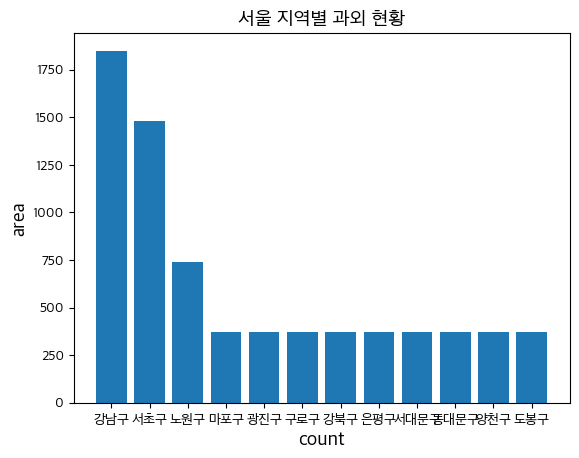

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'Apple SD Gothic Neo',
    }
)

path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
fontprop = fm.FontProperties(fname = path, size = 14)
mpl.rcParams['axes.unicode_minus'] = False

plt.title('서울 지역별 과외 현황', fontproperties = fontprop)
plt.xlabel('count', fontproperties = fontprop)
plt.ylabel('area', fontproperties = fontprop)

areaList = [area[3:] for area in Area['Area']]
countList = [cnt for cnt in Area['count']]
plt.bar(areaList[1:], countList[1:])
plt.show()

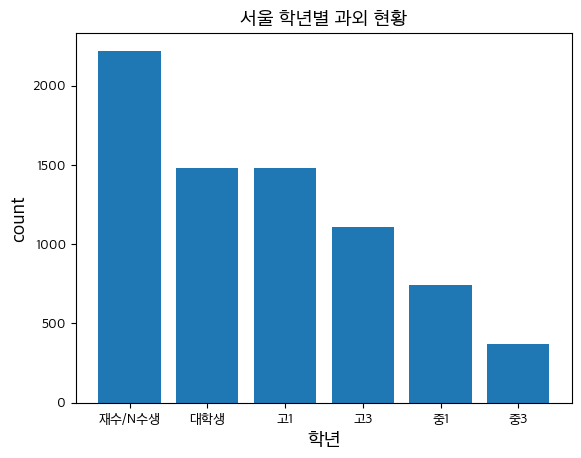

In [40]:
plt.title('서울 학년별 과외 현황', fontproperties = fontprop)
plt.ylabel('count', fontproperties = fontprop)
plt.xlabel('학년', fontproperties = fontprop)

areaList = [grade for grade in Grade['학년']]
countList = [cnt for cnt in Grade['count']]
plt.bar(areaList[1:], countList[1:])
plt.show()

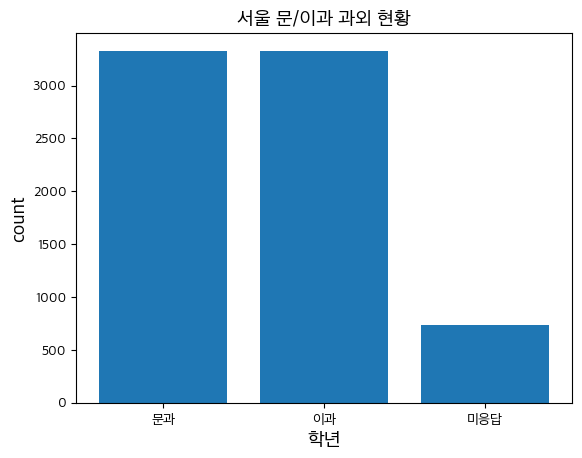

In [41]:
plt.title('서울 문/이과 과외 현황', fontproperties = fontprop)
plt.ylabel('count', fontproperties = fontprop)
plt.xlabel('학년', fontproperties = fontprop)

areaList = [grade for grade in Grade2['문과/이과']]
countList = [cnt for cnt in Grade2['count']]
plt.bar(areaList[1:], countList[1:])
plt.show()

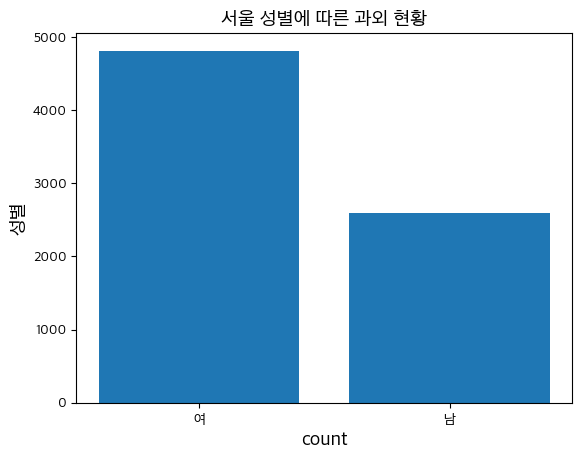

In [42]:
plt.title('서울 성별에 따른 과외 현황', fontproperties = fontprop)
plt.xlabel('count', fontproperties = fontprop)
plt.ylabel('성별', fontproperties = fontprop)

areaList = [grade for grade in Gender['성별']]
countList = [cnt for cnt in Gender['count']]
plt.bar(areaList[1:], countList[1:])
plt.show()